In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")
print(f"Training Data Shape: {train.shape}")
print(f"Testing Data Shape: {test.shape}")

Training Data Shape: (307511, 122)
Testing Data Shape: (48744, 121)


In [4]:
display(test.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(train.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
display(test.head())

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
test.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
test.isna().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
                               ...  
NONLIVINGAPARTMENTS_MEDI       33347
NONLIVINGAPARTMENTS_MODE       33347
COMMONAREA_MODE                33495
COMMONAREA_AVG                 33495
COMMONAREA_MEDI                33495
Length: 121, dtype: int64

In [12]:
test.isna().sum().sort_values(ascending=True)

SK_ID_CURR                         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
                               ...  
NONLIVINGAPARTMENTS_MEDI       33347
NONLIVINGAPARTMENTS_MODE       33347
COMMONAREA_MODE                33495
COMMONAREA_AVG                 33495
COMMONAREA_MEDI                33495
Length: 121, dtype: int64

In [13]:
train_2 = train.copy()

In [14]:
print(train['TARGET'].unique())

[1 0]


In [15]:
decode_map = {0: "Dapat Membayar ", 1: "Kesulitan Membayar"}
train_2['TARGET'] = train['TARGET'].apply(lambda x: decode_map.get(int(x), None) if pd.notna(x) else "Unknown")

In [16]:
target_1 = (train_2[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target_1

,TARGET,COUNT
0,Dapat Membayar,282686
1,Kesulitan Membayar,24825


In [17]:
target_2 = train_2['TARGET'].value_counts(normalize=True)
target_2.reset_index()

,TARGET,proportion
0,Dapat Membayar,0.919271
1,Kesulitan Membayar,0.080729


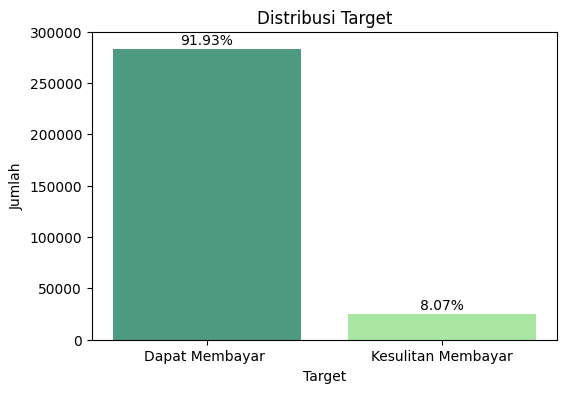

In [18]:
counts = train_2['TARGET'].value_counts()
percentages = train_2['TARGET'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6,4))
dark_green_soft = "#4E9A81"
light_green_pastel = "#A8E6A1"

custom_colors = [dark_green_soft, light_green_pastel]

bars = ax.bar(counts.index, counts.values, color=custom_colors)

# Tambahkan persentase di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2000,   # posisi teks
            f"{percentages.iloc[i]:.2f}%", 
            ha='center', va='bottom', fontsize=10)

# Judul dan label
plt.title('Distribusi Target')
plt.ylim(0, 300000)
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

In [19]:
gender = train_2.groupby(['CODE_GENDER','TARGET']).agg(CUSTOMER=('SK_ID_CURR', 'count')).reset_index().sort_values('CUSTOMER', ascending=False)

In [20]:
gender.reset_index(inplace=True)
gender.drop('index', axis=1, inplace=True)

In [21]:
gender['Percentage'] = round((gender['CUSTOMER']/gender['CUSTOMER'].sum())*100,2)

In [22]:
gender['CODE_GENDER'] = gender['CODE_GENDER'].apply(lambda x: 'Female' if x == 'F' else 'Male')

gender

,CODE_GENDER,TARGET,CUSTOMER,Percentage
0,Female,Dapat Membayar,188278,61.23
1,Male,Dapat Membayar,94404,30.70
2,Female,Kesulitan Membayar,14170,4.61
3,Male,Kesulitan Membayar,10655,3.46
4,Male,Dapat Membayar,4,0.00


In [23]:
gender.drop(4, inplace=True)
gender

,CODE_GENDER,TARGET,CUSTOMER,Percentage
0,Female,Dapat Membayar,188278,61.23
1,Male,Dapat Membayar,94404,30.70
2,Female,Kesulitan Membayar,14170,4.61
3,Male,Kesulitan Membayar,10655,3.46


In [24]:
print(gender['TARGET'].unique())

['Dapat Membayar ' 'Kesulitan Membayar']


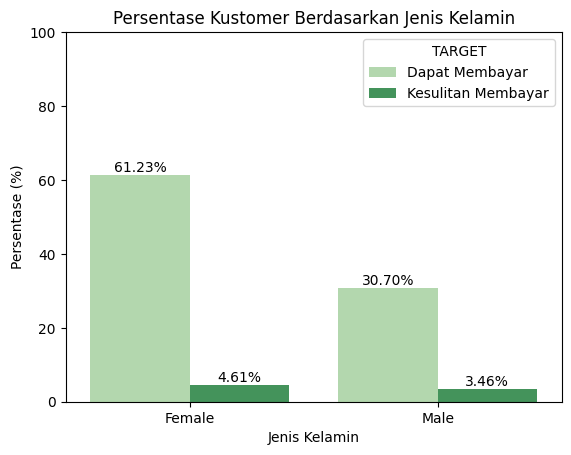

In [25]:
ax_2 = sns.barplot(x='CODE_GENDER', 
                   y='Percentage', 
                   hue='TARGET', 
                   data=gender, palette='Greens')

for p in ax_2.patches:
    height = p.get_height()
    if height > 0:  # cuma kasih label kalau tinggi bar > 0
        percentage = f'{height:.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height + 2
        ax_2.annotate(percentage, (x, y), size=10, ha='center', va='center')

    
#set ylim
plt.ylim(0,100)

#set title
plt.title('Persentase Kustomer Berdasarkan Jenis Kelamin')

#set label
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase (%)')

plt.show()

In [26]:
income = train_2.groupby(['NAME_INCOME_TYPE','TARGET']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)
income.reset_index(inplace=True)
income.drop('index', axis=1, inplace=True)

In [27]:
income['Percentage'] = round((income['CUSTOMER']/income['CUSTOMER'].sum())*100,2)
income

,NAME_INCOME_TYPE,TARGET,CUSTOMER,Percentage
0,Working,Dapat Membayar,143550,46.68
1,Commercial associate,Dapat Membayar,66257,21.55
2,Pensioner,Dapat Membayar,52380,17.03
3,State servant,Dapat Membayar,20454,6.65
4,Working,Kesulitan Membayar,15224,4.95
5,Commercial associate,Kesulitan Membayar,5360,1.74
6,Pensioner,Kesulitan Membayar,2982,0.97
7,State servant,Kesulitan Membayar,1249,0.41
8,Student,Dapat Membayar,18,0.01
9,Unemployed,Dapat Membayar,14,0.00


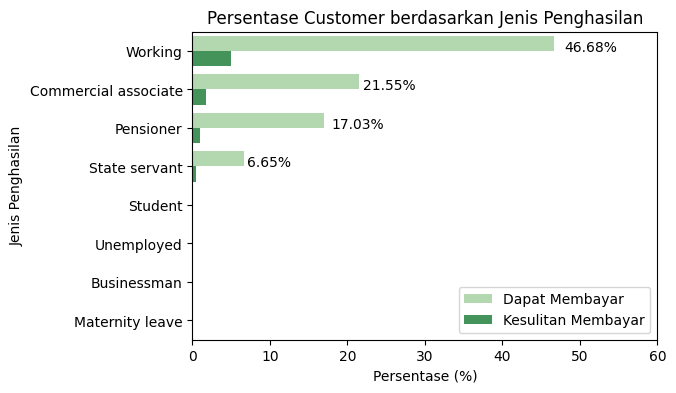

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(data=income, 
            x='Percentage', 
            y='NAME_INCOME_TYPE', 
            hue='TARGET', 
            palette='Greens')

plt.title("Persentase Customer berdasarkan Jenis Penghasilan")
plt.text(x=48, y=0, s=f"{income['Percentage'][0]}%") 
plt.text(x=22, y=1, s=f"{income['Percentage'][1]}%")
plt.text(x=18, y=2, s=f"{income['Percentage'][2]}%")
plt.text(x=7, y=3, s=f"{income['Percentage'][3]}%")
plt.xlabel("Persentase (%)")
plt.ylabel("Jenis Penghasilan")
plt.xlim(0, 60)
plt.legend(loc='lower right')
plt.show()

In [29]:
education = train_2.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)
education.reset_index(inplace=True)
education.drop('index', axis=1, inplace=True)
education['Percentage'] = round((education['CUSTOMER']/education['CUSTOMER'].sum())*100,2)
education

,NAME_EDUCATION_TYPE,TARGET,CUSTOMER,Percentage
0,Secondary / secondary special,Dapat Membayar,198867,64.67
1,Higher education,Dapat Membayar,70854,23.04
2,Secondary / secondary special,Kesulitan Membayar,19524,6.35
3,Incomplete higher,Dapat Membayar,9405,3.06
4,Higher education,Kesulitan Membayar,4009,1.30
5,Lower secondary,Dapat Membayar,3399,1.11
6,Incomplete higher,Kesulitan Membayar,872,0.28
7,Lower secondary,Kesulitan Membayar,417,0.14
8,Academic degree,Dapat Membayar,161,0.05
9,Academic degree,Kesulitan Membayar,3,0.00


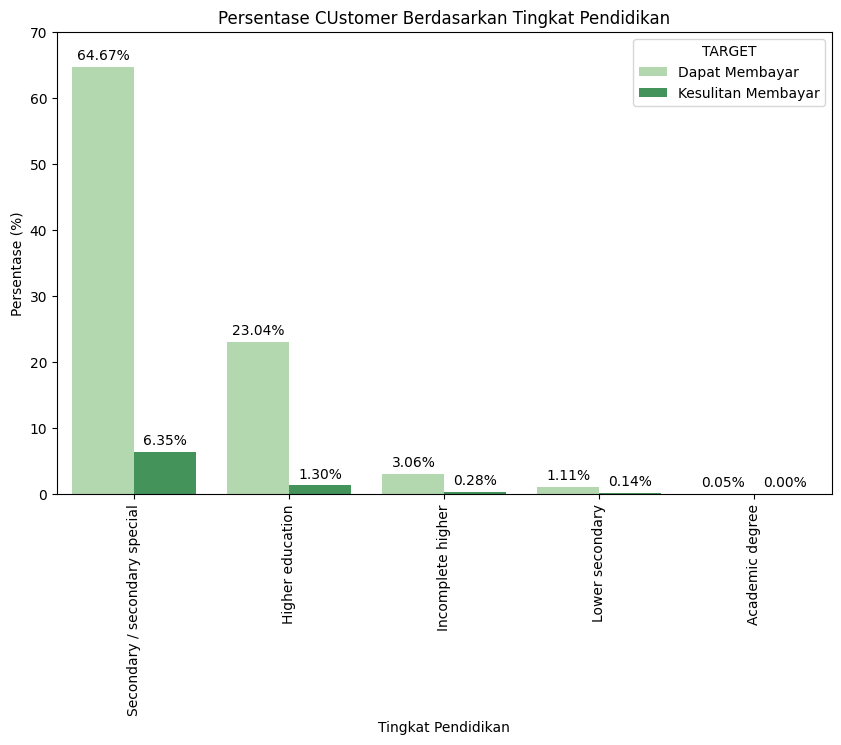

In [42]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=education,
    x='NAME_EDUCATION_TYPE',
    y='Percentage',
    hue='TARGET',
    palette='Greens'
)

plt.title("Persentase CUstomer Berdasarkan Tingkat Pendidikan")
plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=90)
plt.ylim(0, 70)

# Tambahin label persentase di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%", label_type="edge", padding=3)

plt.show()


In [31]:
family_status = train_2.groupby(['NAME_FAMILY_STATUS','TARGET']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)
family_status.reset_index(inplace=True)
family_status.drop('index', axis=1, inplace=True)
family_status['Percentage'] = round((family_status['CUSTOMER']/family_status['CUSTOMER'].sum())*100,2)
family_status

,NAME_FAMILY_STATUS,TARGET,CUSTOMER,Percentage
0,Married,Dapat Membayar,181582,59.05
1,Single / not married,Dapat Membayar,40987,13.33
2,Civil marriage,Dapat Membayar,26814,8.72
3,Separated,Dapat Membayar,18150,5.90
4,Widow,Dapat Membayar,15151,4.93
5,Married,Kesulitan Membayar,14850,4.83
6,Single / not married,Kesulitan Membayar,4457,1.45
7,Civil marriage,Kesulitan Membayar,2961,0.96
8,Separated,Kesulitan Membayar,1620,0.53
9,Widow,Kesulitan Membayar,937,0.30


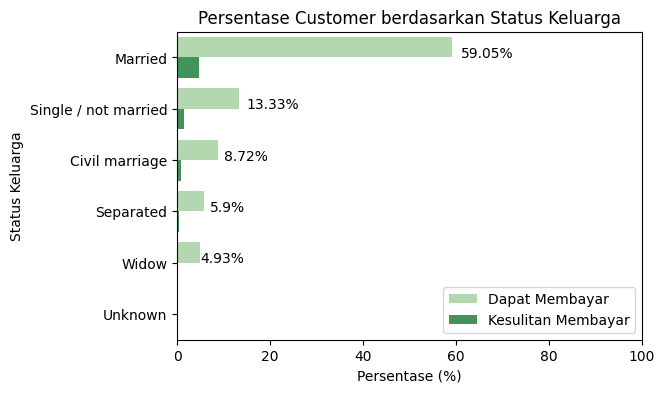

In [32]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=family_status, 
            x='Percentage', 
            y='NAME_FAMILY_STATUS', 
            hue='TARGET', 
            palette='Greens')

plt.text(x=61, y=0, s=f"{family_status['Percentage'][0]}%") 
plt.text(x=15, y=1, s=f"{family_status['Percentage'][1]}%")
plt.text(x=10, y=2, s=f"{family_status['Percentage'][2]}%")
plt.text(x=7, y=3, s=f"{family_status['Percentage'][3]}%")
plt.text(x=5, y=4, s=f"{family_status['Percentage'][4]}%")
plt.title("Persentase Customer berdasarkan Status Keluarga")
plt.xlabel("Persentase (%)")
plt.ylabel("Status Keluarga")
plt.xlim(0, 100)
plt.legend(loc='lower right')
plt.show()

In [33]:
house = train_2.groupby(['NAME_HOUSING_TYPE','TARGET']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)
house.reset_index(inplace=True)
house.drop('index', axis=1, inplace=True)
house['Percentage'] = round((house['CUSTOMER']/house['CUSTOMER'].sum())*100,2)
house

,NAME_HOUSING_TYPE,TARGET,CUSTOMER,Percentage
0,House / apartment,Dapat Membayar,251596,81.82
1,House / apartment,Kesulitan Membayar,21272,6.92
2,With parents,Dapat Membayar,13104,4.26
3,Municipal apartment,Dapat Membayar,10228,3.33
4,Rented apartment,Dapat Membayar,4280,1.39
5,Office apartment,Dapat Membayar,2445,0.80
6,With parents,Kesulitan Membayar,1736,0.56
7,Co-op apartment,Dapat Membayar,1033,0.34
8,Municipal apartment,Kesulitan Membayar,955,0.31
9,Rented apartment,Kesulitan Membayar,601,0.20


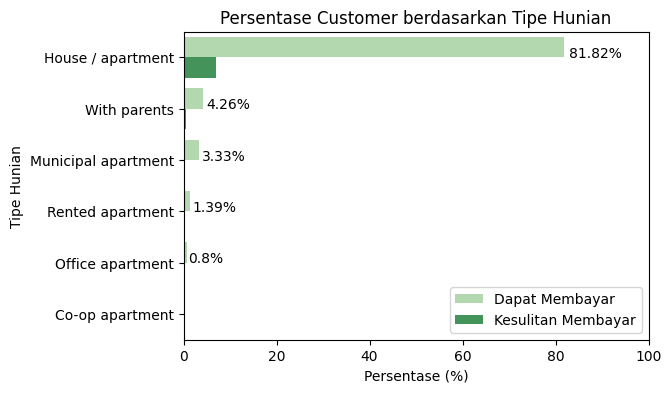

In [34]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=house, 
            x='Percentage', 
            y='NAME_HOUSING_TYPE', 
            hue='TARGET', 
            palette='Greens')

plt.text(x=83, y=0, s=f"{house['Percentage'][0]}%") 
plt.text(x=5, y=1, s=f"{house['Percentage'][2]}%")
plt.text(x=4, y=2, s=f"{house['Percentage'][3]}%")
plt.text(x=2, y=3, s=f"{house['Percentage'][4]}%")
plt.text(x=1, y=4, s=f"{house['Percentage'][5]}%")
plt.title("Persentase Customer berdasarkan Tipe Hunian")
plt.xlabel("Persentase (%)")
plt.ylabel("Tipe Hunian")
plt.xlim(0, 100)
plt.legend(loc='lower right')
plt.show()

In [35]:
occupation = train_2.groupby(['OCCUPATION_TYPE','TARGET']).agg(CUSTOMER=('SK_ID_CURR','count')).reset_index().sort_values('CUSTOMER', ascending=False)
occupation.reset_index(inplace=True)
occupation.drop('index', axis=1, inplace=True)
occupation['Percentage'] = round((occupation['CUSTOMER']/occupation['CUSTOMER'].sum())*100,2)
occupation

,OCCUPATION_TYPE,TARGET,CUSTOMER,Percentage
0,Laborers,Dapat Membayar,49348,23.37
1,Sales staff,Dapat Membayar,29010,13.74
2,Core staff,Dapat Membayar,25832,12.24
3,Managers,Dapat Membayar,20043,9.49
4,Drivers,Dapat Membayar,16496,7.81
5,High skill tech staff,Dapat Membayar,10679,5.06
6,Accountants,Dapat Membayar,9339,4.42
7,Medicine staff,Dapat Membayar,7965,3.77
8,Security staff,Dapat Membayar,5999,2.84
9,Laborers,Kesulitan Membayar,5838,2.77


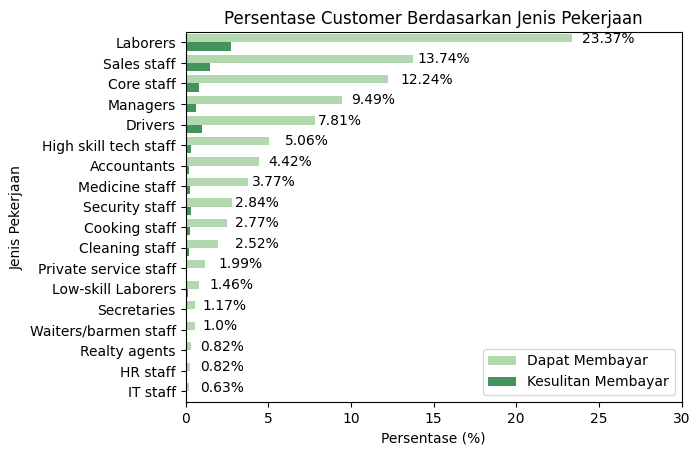

In [36]:
ax = sns.barplot(data=occupation, 
            x='Percentage', 
            y='OCCUPATION_TYPE', 
            hue='TARGET', 
            palette='Greens')

plt.text(x=24, y=0, s=f"{occupation['Percentage'][0]}%") 
plt.text(x=14, y=1, s=f"{occupation['Percentage'][1]}%")
plt.text(x=13, y=2, s=f"{occupation['Percentage'][2]}%")
plt.text(x=10, y=3, s=f"{occupation['Percentage'][3]}%")
plt.text(x=8, y=4, s=f"{occupation['Percentage'][4]}%")
plt.text(x=6, y=5, s=f"{occupation['Percentage'][5]}%")
plt.text(x=5, y=6, s=f"{occupation['Percentage'][6]}%")
plt.text(x=4, y=7, s=f"{occupation['Percentage'][7]}%")
plt.text(x=3, y=8, s=f"{occupation['Percentage'][8]}%")
plt.text(x=3, y=9, s=f"{occupation['Percentage'][9]}%")
plt.text(x=3, y=10, s=f"{occupation['Percentage'][10]}%")
plt.text(x=2, y=11, s=f"{occupation['Percentage'][11]}%")
plt.text(x=1.47, y=12, s=f"{occupation['Percentage'][12]}%")
plt.text(x=1, y=13, s=f"{occupation['Percentage'][13]}%")
plt.text(x=1, y=14, s=f"{occupation['Percentage'][14]}%")
plt.text(x=0.9, y=15, s=f"{occupation['Percentage'][15]}%")
plt.text(x=0.9, y=16, s=f"{occupation['Percentage'][16]}%")
plt.text(x=0.9, y=17, s=f"{occupation['Percentage'][17]}%")
plt.title("Persentase Customer Berdasarkan Jenis Pekerjaan")
plt.xlabel("Persentase (%)")
plt.ylabel("Jenis Pekerjaan")
plt.xlim(0, 30)
plt.legend(loc='lower right')
plt.show()

In [37]:
# Rapikan string (hapus spasi)
train_2['TARGET'] = train_2['TARGET'].str.strip()

# Mapping ke angka
train_2['TARGET_NUM'] = train_2['TARGET'].map({
    'Dapat Membayar': 0,
    'Kesulitan Membayar': 1
})

# Buat kolom umur
train_2['AGE'] = -(train_2['DAYS_BIRTH']) // 365

In [38]:
no_age  = train_2.loc[train_2['TARGET_NUM']==0, 'AGE']
yes_age = train_2.loc[train_2['TARGET_NUM']==1, 'AGE']

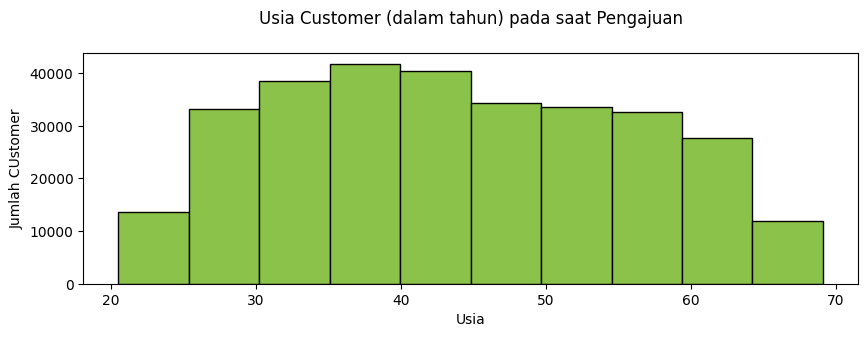

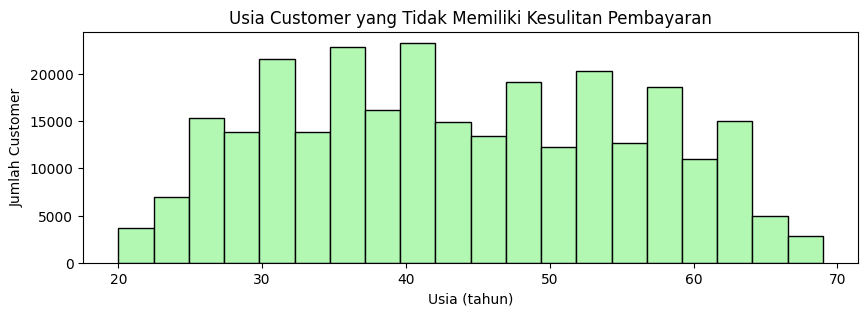

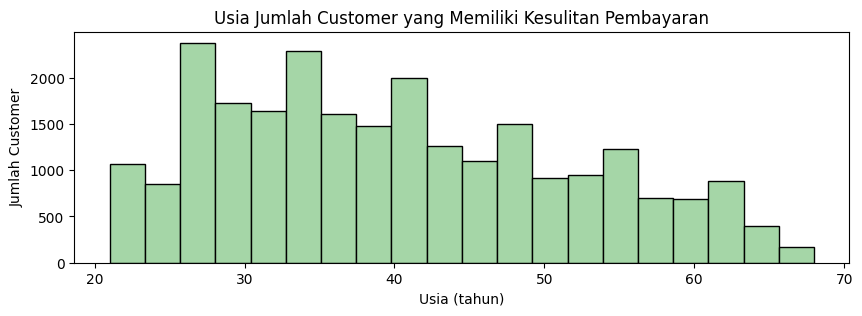

In [41]:
plt.figure(figsize=(10,3))
plt.hist(train_2['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='#8bc34a')
plt.title('Usia Customer (dalam tahun) pada saat Pengajuan\n')
plt.xlabel('Usia')
plt.ylabel('Jumlah CUstomer')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=20, edgecolor='black', color='#b2f7b2')
plt.title('Usia Customer yang Tidak Memiliki Kesulitan Pembayaran')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah Customer')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=20, edgecolor='black', color='#a5d6a7')
plt.title('Usia Jumlah Customer yang Memiliki Kesulitan Pembayaran')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah Customer')
plt.show()

In [647]:
train.drop(['SK_ID_CURR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
               'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY',], axis=1, inplace=True)

In [648]:
train.dropna(axis=1, inplace=True)

In [649]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [650]:
train.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [651]:
train_cols = train.drop("TARGET", axis=1).columns
test = test[train_cols]

In [652]:
test.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [653]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           48744 non-null  object 
 1   CODE_GENDER                  48744 non-null  object 
 2   FLAG_OWN_CAR                 48744 non-null  object 
 3   FLAG_OWN_REALTY              48744 non-null  object 
 4   CNT_CHILDREN                 48744 non-null  int64  
 5   AMT_INCOME_TOTAL             48744 non-null  float64
 6   AMT_CREDIT                   48744 non-null  float64
 7   NAME_INCOME_TYPE             48744 non-null  object 
 8   NAME_EDUCATION_TYPE          48744 non-null  object 
 9   NAME_FAMILY_STATUS           48744 non-null  object 
 10  NAME_HOUSING_TYPE            48744 non-null  object 
 11  REGION_POPULATION_RELATIVE   48744 non-null  float64
 12  DAYS_BIRTH                   48744 non-null  int64  
 13  FLAG_MOBIL      

In [654]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH']//365
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].abs()
train['DAYS_BIRTH']

0         26
1         46
2         53
3         53
4         55
          ..
307506    26
307507    57
307508    42
307509    33
307510    47
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [655]:
test['DAYS_BIRTH'] = test['DAYS_BIRTH']//365
test['DAYS_BIRTH'] = test['DAYS_BIRTH'].abs()
test['DAYS_BIRTH']

0        53
1        50
2        55
3        39
4        36
         ..
48739    55
48740    31
48741    44
48742    39
48743    39
Name: DAYS_BIRTH, Length: 48744, dtype: int64

In [656]:
label_encoder = LabelEncoder()
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE'
]

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

In [657]:
scaler = MinMaxScaler()

normalized_train_data = scaler.fit_transform(train)

In [658]:
train = pd.DataFrame(normalized_train_data, columns=train.columns)
train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,1.0,0.0,0.5,0.0,1.0,0.0,0.001512,0.090287,1.000000,1.00,...,0.102041,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.5,0.087719
1,0.0,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.571429,0.25,...,0.510204,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.684211
2,0.0,1.0,0.5,1.0,1.0,0.0,0.000358,0.022472,1.000000,1.00,...,0.653061,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.192982
3,0.0,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,1.000000,1.00,...,0.653061,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.087719
4,0.0,0.0,0.5,0.0,1.0,0.0,0.000819,0.116854,1.000000,1.00,...,0.693878,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.649123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.5,0.0,0.0,0.0,0.001127,0.052360,1.000000,1.00,...,0.102041,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.754386
307507,0.0,0.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.428571,1.00,...,0.734694,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,1.000000
307508,0.0,0.0,0.0,0.0,1.0,0.0,0.001089,0.157969,1.000000,0.25,...,0.428571,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.684211
307509,1.0,0.0,0.0,0.0,1.0,0.0,0.001243,0.081175,0.142857,1.00,...,0.244898,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0.052632


In [659]:
label_encoder = LabelEncoder()
categorical_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'ORGANIZATION_TYPE'
]

for col in categorical_cols:
    test[col] = label_encoder.fit_transform(test[col])

In [660]:
scaler = MinMaxScaler()

normalized_test_data = scaler.fit_transform(test)

In [661]:
test = pd.DataFrame(normalized_test_data, columns=test.columns)
test

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,0.0,0.0,0.0,1.0,0.00,0.024654,0.238037,1.000000,0.25,0.25,...,0.653061,1.0,1.0,0.0,1.0,0.0,1.0,0.5,0.75,0.491228
1,0.0,1.0,0.0,1.0,0.00,0.016440,0.080785,1.000000,1.00,0.25,...,0.591837,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.75,0.736842
2,0.0,1.0,1.0,1.0,0.00,0.040054,0.280965,1.000000,0.25,0.25,...,0.693878,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.75,0.947368
3,0.0,0.0,0.0,1.0,0.10,0.065721,0.695297,1.000000,1.00,0.25,...,0.367347,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.75,0.087719
4,0.0,1.0,1.0,0.0,0.05,0.034920,0.263804,1.000000,1.00,0.25,...,0.306122,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.75,0.087719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.0,0.0,0.0,1.0,0.00,0.021574,0.167035,1.000000,1.00,1.00,...,0.693878,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.00,0.578947
48740,0.0,0.0,0.0,0.0,0.10,0.029787,0.262401,0.166667,1.00,0.25,...,0.204082,1.0,1.0,0.0,1.0,0.0,0.0,0.5,0.75,0.894737
48741,0.0,0.0,1.0,1.0,0.05,0.040054,0.122699,0.166667,1.00,0.25,...,0.469388,1.0,1.0,0.0,1.0,1.0,0.0,0.5,0.75,0.087719
48742,0.0,1.0,0.0,0.0,0.00,0.045187,0.184049,0.166667,0.25,0.25,...,0.367347,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.75,0.736842


In [662]:
X = train.drop('TARGET', axis=1)
y = train['TARGET']

In [663]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [664]:
smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [665]:
print("Count per kelas setelah resample:")
print(pd.Series(y_train_resampled).value_counts())

print("\nProporsi per kelas setelah resample:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

Count per kelas setelah resample:
TARGET
0.0    226148
1.0    226148
Name: count, dtype: int64

Proporsi per kelas setelah resample:
TARGET
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [666]:
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [667]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr))
auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC-ROC: {auc:.3f}")

ROC-AUC: 0.6452446673212185
AUC-ROC: 0.645


In [668]:
print("MCC:", matthews_corrcoef(y_test, y_pred_lr))
mcc = matthews_corrcoef(y_test, y_pred_lr)
print(f"MCC: {mcc:.3f}")

MCC: 0.11808078996028147
MCC: 0.118


In [669]:
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"Akurasi: {accuracy:.2f}%")

Akurasi: 0.6087670520137229
Akurasi: 60.88%


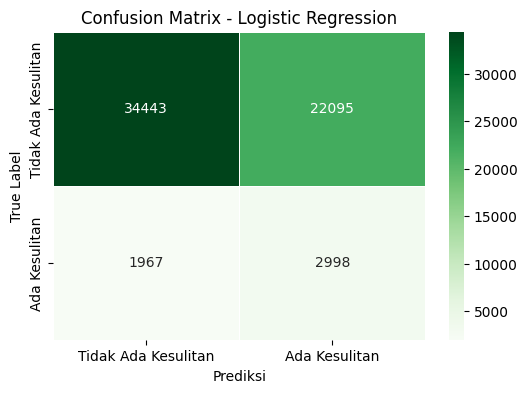

In [670]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], 
            yticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], 
            cbar=True, linewidths=0.5, linecolor='white')

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.show()

In [671]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.61      0.74     56538
         1.0       0.12      0.60      0.20      4965

    accuracy                           0.61     61503
   macro avg       0.53      0.61      0.47     61503
weighted avg       0.88      0.61      0.70     61503



In [676]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_resampled)

KNeighborsClassifier()

In [677]:
y_pred_knn = knn.predict(X_test_knn)

In [678]:
y_pred_proba_knn = knn.predict_proba(X_test_knn)[:, 1]

In [679]:
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_knn))
auc = roc_auc_score(y_test, y_pred_proba_knn)
print(f"AUC-ROC: {auc:.3f}")

AUC-ROC: 0.5508337502209122
AUC-ROC: 0.551


In [680]:
print("Matthews Corrcoef:", matthews_corrcoef(y_test, y_pred_knn))
mcc = matthews_corrcoef(y_test, y_pred_knn)
print(f"MCC: {mcc:.3f}")

Matthews Corrcoef: 0.039881320608769456
MCC: 0.040


In [681]:
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(f"Akurasi: {accuracy:.2f}%")

Akurasi: 0.7016080516397574
Akurasi: 70.16%


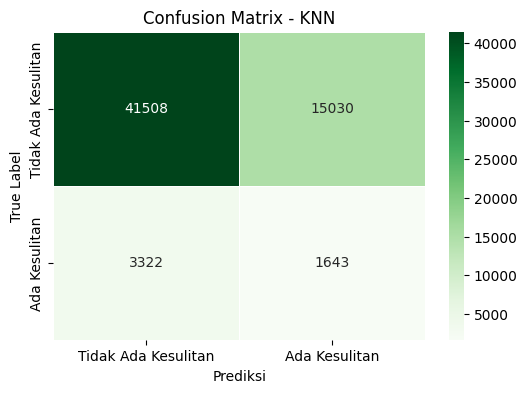

In [682]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tidak Ada Kesulitan','Ada Kesulitan'],
            yticklabels=['Tidak Ada Kesulitan','Ada Kesulitan'],
            cbar=True, linewidths=0.5, linecolor='white')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.show()

In [683]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.73      0.82     56538
         1.0       0.10      0.33      0.15      4965

    accuracy                           0.70     61503
   macro avg       0.51      0.53      0.49     61503
weighted avg       0.86      0.70      0.77     61503



In [684]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [685]:
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))
auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC-ROC: {auc:.3f}")

AUC-ROC: 0.6051456253058972
AUC-ROC: 0.605


In [686]:
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))
mcc = matthews_corrcoef(y_test, y_pred_rf)
print(f"MCC: {mcc:.3f}")

MCC: 0.034366023085363955
MCC: 0.034


In [687]:
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"Akurasi: {accuracy:.2f}%")

Akurasi: 0.9099556119213696
Akurasi: 91.00%


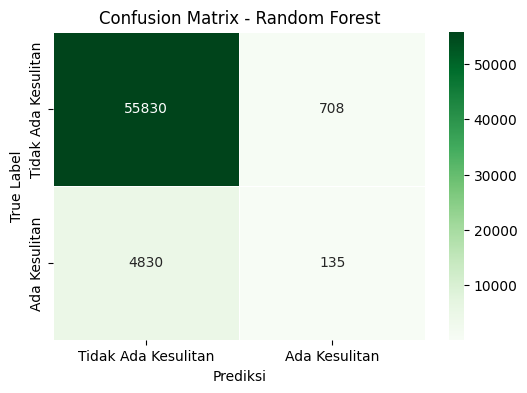

In [688]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], 
            yticklabels=['Tidak Ada Kesulitan', 'Ada Kesulitan'], 
            cbar=True, linewidths=0.5, linecolor='white')

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.show()

In [689]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56538
         1.0       0.16      0.03      0.05      4965

    accuracy                           0.91     61503
   macro avg       0.54      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503



In [690]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [691]:
y_pred_dt = model.predict(X_test)

In [692]:
y_pred_proba_dt = model.predict_proba(X_test)[:, 1]

In [693]:
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_dt))
auc = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC-ROC: {auc:.3f}")

AUC-ROC: 0.5159225405957304
AUC-ROC: 0.516


In [694]:
print("MCC:", matthews_corrcoef(y_test, y_pred_dt))
mcc = matthews_corrcoef(y_test, y_pred_dt)
print(f"MCC: {mcc:.3f}")

MCC: 0.025784535681611685
MCC: 0.026


In [695]:
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Akurasi: {accuracy:.2f}%")

Akurasi: 0.8146431881371641
Akurasi: 81.46%


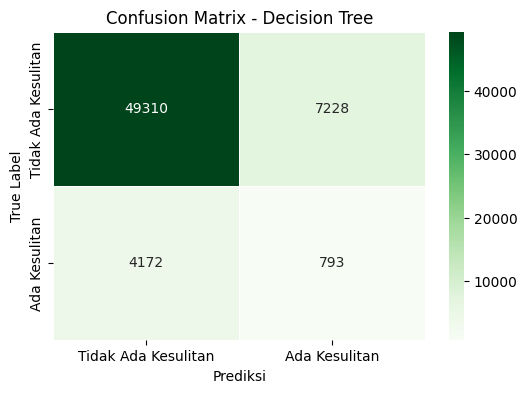

In [696]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tidak Ada Kesulitan','Ada Kesulitan'],
            yticklabels=['Tidak Ada Kesulitan','Ada Kesulitan'],
            cbar=True, linewidths=0.5, linecolor='white')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('True Label')
plt.show()

In [697]:
print("Classification Report :\n", classification_report(y_test, y_pred_dt))

Classification Report :
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.90     56538
         1.0       0.10      0.16      0.12      4965

    accuracy                           0.81     61503
   macro avg       0.51      0.52      0.51     61503
weighted avg       0.86      0.81      0.83     61503



In [698]:
features = X_train.columns

# Ambil feature importance tiap model
dt_importances = model.feature_importances_
rf_importances = rf_model.feature_importances_

# Buat DataFrame
feat_df = pd.DataFrame({
    'Feature': features,
    'DecisionTree': dt_importances,
    'RandomForest': rf_importances
})

# Hitung rata-rata importance
feat_df['MeanImportance'] = feat_df[['DecisionTree','RandomForest']].mean(axis=1)

# Sortir berdasarkan rata-rata
feat_df = feat_df.sort_values(by='MeanImportance', ascending=False)

# Tampilkan top 10 fitur paling penting secara keseluruhan
print(feat_df.head(10))

                       Feature  DecisionTree  RandomForest  MeanImportance
4                 CNT_CHILDREN      0.251897      0.165622        0.208759
12                  DAYS_BIRTH      0.180424      0.128197        0.154311
5             AMT_INCOME_TOTAL      0.112541      0.145105        0.128823
6                   AMT_CREDIT      0.123917      0.121033        0.122475
11  REGION_POPULATION_RELATIVE      0.105872      0.125751        0.115811
21           ORGANIZATION_TYPE      0.046411      0.075628        0.061020
9           NAME_FAMILY_STATUS      0.044851      0.055571        0.050211
8          NAME_EDUCATION_TYPE      0.024806      0.032023        0.028415
1                  CODE_GENDER      0.022173      0.021446        0.021809
7             NAME_INCOME_TYPE      0.012835      0.018940        0.015888


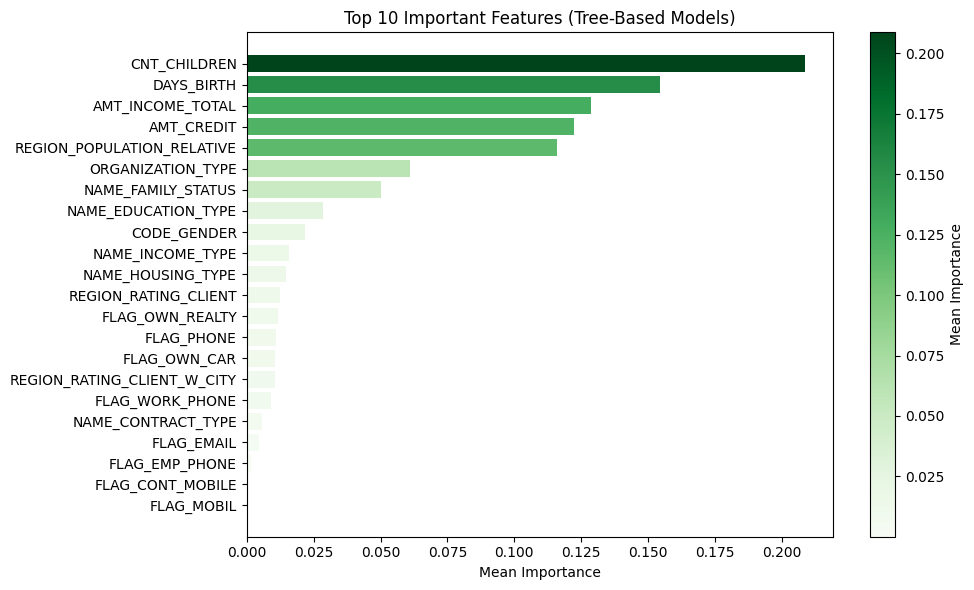

In [699]:
vals = feat_df['MeanImportance'].values
norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = mpl.cm.Greens
colors = cmap(norm(vals))

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(feat_df['Feature'], vals, color=colors)
ax.invert_yaxis()
ax.set_title('Top 10 Important Features (Tree-Based Models)')
ax.set_xlabel('Mean Importance')

# tambahin colorbar
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # supaya bisa dipakai buat colorbar
fig.colorbar(sm, ax=ax, label='Mean Importance')

plt.tight_layout()
plt.show()

In [700]:
results = pd.DataFrame([["Logistic Regression", 0.6087, 0.6452],
                       ["K-Nearest Neighbor", 0.7016, 0.5508],
                       ["Random Forest", 0.9099, 0.6051],
                       ["Decision Tree", 0.8146, 0.5159]],
                        columns = ["Models", "Training Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score'], ascending=False)

,Models,Training Accuracy Score,ROC Score
2,Random Forest,0.9099,0.6051
3,Decision Tree,0.8146,0.5159
1,K-Nearest Neighbor,0.7016,0.5508
0,Logistic Regression,0.6087,0.6452
